<a href="https://colab.research.google.com/github/ananya-jaikumar/TSF-DataScience-and-Business-Analytis-Internship-Tasks/blob/main/Prediction_using_unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ananya Jaikumar**
Task 2: From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

#**IMPORTING LIBRARIES**

In [25]:
# Importing all required libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import style
import seaborn as sns


# **LOADING IRIS DATA**

In [4]:
# Reading the data 
iris_df = pd.read_csv("/content/drive/MyDrive/Iris.csv", index_col = 0)
print("Let's see a part of the whole dataset ")
iris_df.head(10)

Let's see a part of the whole dataset 


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


# **VISUALIZING DATA**

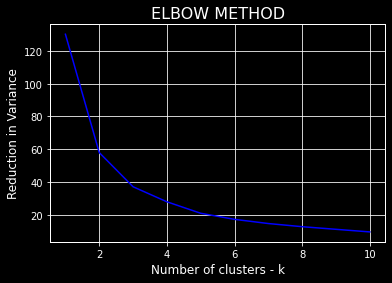

In [9]:
# Finding the optimum number of clusters for k-means classification
x = iris_df.iloc[:, [0, 1]].values

#Creating an empty list for Total Variance
t_v = [] 

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    t_v.append(kmeans.inertia_)
    
#Plotting THE ELBOW POINT GRAPH to get the k-value
plt.plot( range(1,11) , t_v, c='blue')
plt.title('ELBOW METHOD',fontsize = 16)
style.use('ggplot')
style.use('dark_background')
plt.xlabel('Number of clusters - k',fontsize = 12)
plt.ylabel('Reduction in Variance', fontsize = 12) 
plt.show()

In [10]:
# From the ELBOW POINT we got our k value, i.e k = 3
kmeans = KMeans(n_clusters = 3)
number_of_clusters = kmeans.fit_predict(x)

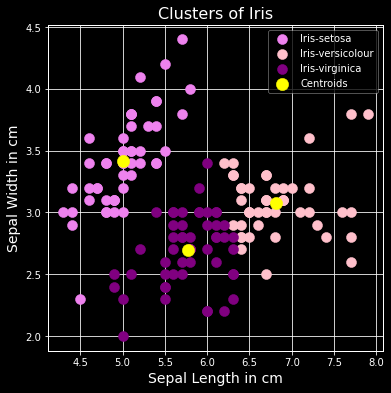

In [18]:
# PLotting for Clusters
plt.figure(figsize=[6,6])
plt.title('Clusters of Iris', fontsize = 16)
plt.xlabel('Sepal Length in cm', fontsize = 14)
plt.ylabel('Sepal Width in cm', fontsize = 14)
style.use('dark_background')

plt.scatter(x[number_of_clusters == 0, 0], x[number_of_clusters == 0, 1],s = 100, c = 'violet', label = 'Iris-setosa')
plt.scatter(x[number_of_clusters == 1, 0], x[number_of_clusters == 1, 1],s = 100, c = 'pink', label = 'Iris-versicolour')
plt.scatter(x[number_of_clusters == 2, 0], x[number_of_clusters == 2, 1],s = 100, c = 'purple', label = 'Iris-virginica')

# Plotting for Centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 150, c = 'yellow', label = 'Centroids')

plt.legend()

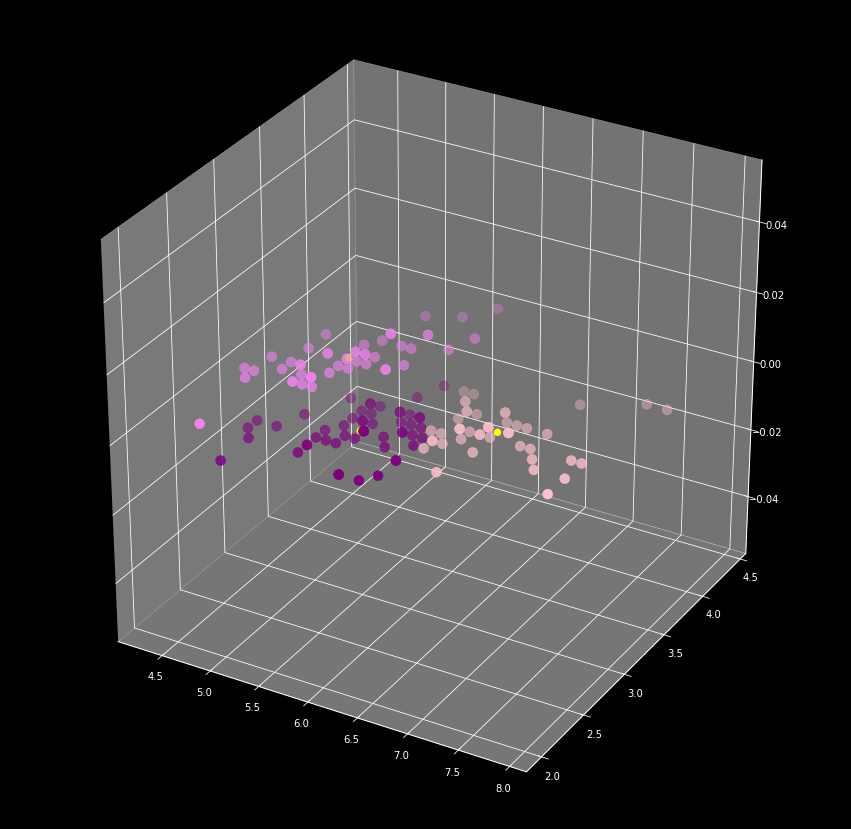

In [21]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
style.use('dark_background')
plt.scatter(x[number_of_clusters == 0, 0], x[number_of_clusters == 0, 1],s = 100, c = 'violet', label = 'Iris-setosa')
plt.scatter(x[number_of_clusters == 1, 0], x[number_of_clusters == 1, 1],s = 100, c = 'pink', label = 'Iris-versicolour')
plt.scatter(x[number_of_clusters == 2, 0], x[number_of_clusters == 2, 1],s = 100, c = 'purple', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
plt.show()

# **Labeling the Predictions**

In [22]:
#considering 0 Corresponds to 'Iris-setosa'
#1 to 'Iris-versicolour'
#2 to 'Iris-virginica'
number_of_clusters = np.where(number_of_clusters==0, 'Iris-setosa', number_of_clusters)
number_of_clusters = np.where(number_of_clusters=='1', 'Iris-versicolour', number_of_clusters)
number_of_clusters = np.where(number_of_clusters=='2', 'Iris-virginica', number_of_clusters)

# **Adding prediction to the dataset**

In [23]:
data_with_clusters = iris_df.copy()
data_with_clusters["Cluster"] = number_of_clusters
print(data_with_clusters.head(5))

    SepalLengthCm  SepalWidthCm  ...      Species      Cluster
Id                               ...                          
1             5.1           3.5  ...  Iris-setosa  Iris-setosa
2             4.9           3.0  ...  Iris-setosa  Iris-setosa
3             4.7           3.2  ...  Iris-setosa  Iris-setosa
4             4.6           3.1  ...  Iris-setosa  Iris-setosa
5             5.0           3.6  ...  Iris-setosa  Iris-setosa

[5 rows x 6 columns]


# **BARPLOT- CLUSTER DISTRIBUTION**

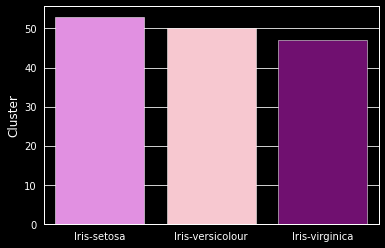

In [28]:
# Bar plot
sns.set_style('darkgrid')
style.use('dark_background')
sns.barplot(x = data_with_clusters["Cluster"] .unique(),
            y = data_with_clusters["Cluster"] .value_counts(),
            palette=sns.color_palette(["violet", "pink", "purple"]));

**Bar Plot Inference**
There are around 50 iris-versicolour , 48 Iris-virginica and roughly 52 Iris-setosa samples in the dataset as predicted.